## Kazakh-British Technical University
### Introduction to Machine Learning

#### Seminar 9, Linear Regression


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

In [44]:
try:
    from ipywidgets import interact, IntSlider, fixed
except ImportError:
    print('Install the libraries')

# Formulation of the problem

A description of $n$ objects is given based on $m$ characteristics. It is usually expressed as a matrix of size $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<p> ($x^{(i)}_j$ means the $j$-th attribute of the $i$-th object) </p>
A **real** dependent variable is given, which also relates to these objects: $y \in \mathbb{R}^n$.

Our task is to identify a **linear** relationship between features in $X$ and values in $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$
That is, it is necessary to estimate the coefficients $\beta_i$.

In the case of linear regression, the coefficients $\beta_i$ are calculated to minimize the sum of squared errors over all observations:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X \beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$ $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n }\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n }_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2 \rightarrow \min $$

## Example: Cost of a car

Download [training data](http://bit.ly/1gIQs6C) and [test data](http://bit.ly/IYPHrK) on the characteristics of Honda Accord cars. The column names speak for themselves.

In [45]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [46]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [47]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [48]:
X = data[['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

In [49]:
y = data[['price']]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [52]:
print(f'X_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (164, 25)
x_test: (41, 25)
y_train: (164, 1)
y_test: (41, 1)


Let's choose one mileage variable as a predictor, and a price variable as a dependent variable

In [53]:
data['enginesize'].dtype

dtype('int64')

In [54]:
data.dtypes=='int64'

car_ID               True
symboling            True
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight           True
enginetype          False
cylindernumber      False
enginesize           True
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower           True
peakrpm              True
citympg              True
highwaympg           True
price               False
dtype: bool

In [55]:
cols=data.dtypes[data.dtypes!='object'].index.tolist()

In [56]:
data = data[cols]

In [57]:
data.corr()['price'].reset_index().sort_values('price',ascending = False)

,index,price
15,price,1.000000
7,enginesize,0.874145
6,curbweight,0.835305
11,horsepower,0.808139
4,carwidth,0.759325
3,carlength,0.682920
2,wheelbase,0.577816
8,boreratio,0.553173
5,carheight,0.119336
9,stroke,0.079443


In [58]:
x_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
97,98,1,nissan note,gas,std,four,wagon,fwd,front,94.5,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22
51,52,1,maxda glc deluxe,gas,std,two,hatchback,fwd,front,93.1,...,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,four,122,idi,3.39,3.39,22.7,64,4650,36,42
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()

Let's train the model

In [62]:
model = LinearRegression(fit_intercept=True)

In [63]:
model.fit(x_train['enginesize'].values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [64]:
#x_train['enginesize'].valuesC

In [87]:
y_pred = model.predict(x_test['enginesize'].values.reshape(-1,1))
y_pred[:5]

array([[14869.14585911],
       [14525.56189601],
       [14869.14585911],
       [10402.55433887],
       [ 7138.50668946]])

In [66]:
y_test[:5]

,price
5,15250.0
66,18344.0
6,17710.0
174,10698.0
54,7395.0


In [67]:
(((y_pred - y_test)**2).sum() / len(y_pred))**0.5

price    3995.598484
dtype: float64

In [68]:
# x_test = 
# y_test =

## ERROR OF MODEL

In [69]:
# x_train['enginesize'].values
# y_train.values

In [70]:
model.coef_

array([[171.79198155]])

In [71]:
print('Model:\nprice = %.2f + (%.2f) * enginesize' % (model.intercept_, model.coef_[0]))

Model:
price = -8494.56 + (171.79) * enginesize


In [72]:
model

LinearRegression()

In [73]:
def my_model(enginesize):
    price = -8494.56 + (171.79) * enginesize
    return price

In [74]:
np.array(x_test['enginesize'].iloc[0])

array(136, dtype=int64)

In [75]:
my_model(np.array(x_test['enginesize'].iloc[0]))

14868.88

In [76]:
model.predict(np.array(x_test['enginesize'].iloc[0]).reshape(-1, 1))

array([[14869.14585911]])

In [77]:
# print('Model:\nprice = %.2f + (%.2f)*carwidth + (%.2f) * enginesize' % (model.intercept_, model.coef_[0], model.coef_[1]))

In [78]:
# def model_linear(carwidth, enginesize):
#     return -67415.66 + (974.15)*carwidth + (129.90) * enginesize

In [79]:
#x_test['carwidth']

In [80]:
# test_list = []
# for i in x_test.index.tolist():
#     pred_def = model_linear(x_test['carwidth'][i], x_test['enginesize'][i])
#     test_list.append(pred_def)

Draw the model prediction along with the data on a plane

#### assignment
- Try to find the ways of visualization scatter when there are more than one feature

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
#x_test=X_test[['carwidth']]

### Residues and quality measures

Let's take a look at the errors (residues)

In [83]:
#res = pd.DataFrame(y_hat)[0] - y_test.reset_index()['price']

In [95]:
y_pred.shape

(41, 1)

In [96]:
y_test.reset_index()['price'].shape

(41,)

In [97]:
x_test.shape

(41, 25)

Text(0, 0.5, 'residuals')

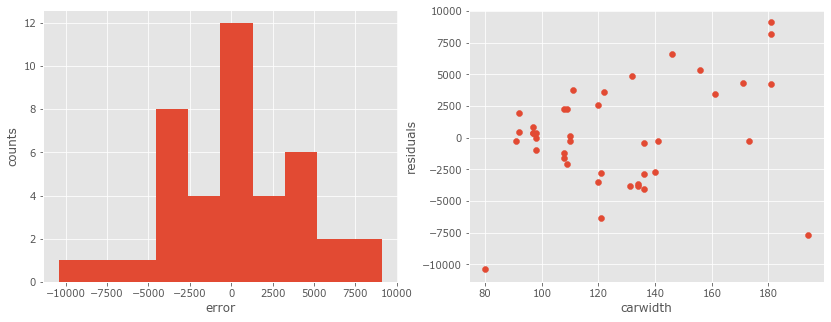

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

y_hat = model.predict(x_test['enginesize'].values.reshape(-1,1))
#res = y_test - pd.DataFrame(y_hat)
res = pd.DataFrame(y_pred)[0] - y_test.reset_index()['price']
#print(res)
ax[0].hist(res)
ax[0].set_xlabel('error')
ax[0].set_ylabel('counts')

ax[1].scatter(x_test['enginesize'].values, res)
ax[1].set_xlabel('carwidth')
ax[1].set_ylabel('residuals')


It's important to look at the leftovers.<br/>
First, they must be normally distributed (Gauss-Markov Theorem).<br/>
Secondly, there should be no clear dependencies between attribute values and residuals.<br/>
Well, there are actually a lot of conditions

Let's look at quality measures

In [99]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [100]:
pred_y = pd.DataFrame(y_hat)[0].values
fact_y = y_test.reset_index()['price'].values

In [103]:
mean_absolute_error(y_pred, y_test)

3022.697260565032

In [105]:
rmse=mean_squared_error(y_pred, y_test)**0.5
rmse

3995.598483721008

You can calculate simple options for aggregating residues, for example:

* $\frac{1}{n} \sum_i |\hat{y}^{(i)}-y^{(i)}|$ - mean absolute error
* $\frac{1}{n} \sum_i (\hat{y}^{(i)}-y^{(i)})^2$ - mean square error

In [106]:
print('Mean absolute error %.2f' % mean_absolute_error(pred_y, fact_y))
print('Mean squared error %.2f' % mean_squared_error(pred_y, fact_y))

Mean absolute error 3022.70
Mean squared error 15964807.24


We can consider a more complex measure: the coefficient of determination $R^2$:

* $TSS = \sum_i (y^{(i)}-\bar{y})^2$ - total sum of squares
* $RSS = \sum_i (\hat{y}^{(i)}-y^{(i)})^2$ - residual sum of squares
* $ESS = \sum_i (\hat{y}^{(i)}-\bar{y})^2$ - explained sum of squares

For simplicity, we will assume that
$$TSS = ESS + RSS$$

Then the Coefficient of Determination $R^2=1-\frac{RSS}{TSS}$

Calculate it for our model

In [118]:
r2_score(pred_y, fact_y)

0.3536745277228829

## MSE 

In [109]:
def mean_squared_error(y_true, y_pred):
  
    pass

In [110]:
mean_squared_error(y_true = fact_y, y_pred = pred_y)

15964807.24311362

In [113]:
mean_squared_error(y_true = fact_y, y_pred = pred_y)**0.5

3995.598483721008

## MAE 

In [111]:
def mean_absolute_error(y_true, y_pred):
 
    pass

In [112]:
mean_absolute_error(y_true = fact_y, y_pred = pred_y)

3022.697260565032

### $R^2$  (R - SQUARE)

In [126]:
def r2_score_f(y_true, y_pred):
    

    
    pass


In [127]:
r2_score_f(y_true = fact_y, y_pred = pred_y)

0.4394146557964592

In [131]:
r2_score(fact_y, pred_y)

0.4394146557964592

In [129]:
y_true3 = np.array([3, -0.5, 2, 7])
y_pred3 = np.array([2.5, 0.0, 2, 8])

r2 = r2_score(y_true3, y_pred3)
print(f"R-squared Score: {r2:.3f}")

R-squared Score: 0.949


In [130]:
r2_score_f(y_true3, y_pred3)

0.9486081370449679

## CROSS VALIDATION

In [153]:
from sklearn.model_selection import KFold

def cross_validation_regression(model, X, y, K=5):
    
    
    kf = KFold(n_splits=K, shuffle=True, random_state=42)
    mse_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)
    
    average_mse = np.mean(mse_scores)
    return average_mse
    
    

In [154]:
cross_validation_regression(model, X[['enginesize']], y, K=5)

15405435.099595204

In [144]:
X['enginesize'].shape

(205,)

## Polinomial Linear Regression

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit the linear polynomial regression model
poly_degree = 9  # degree of polynomial features
X_poly = np.column_stack([X**i for i in range(1, poly_degree + 1)])
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [34]:
X[:10]

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304]])

In [35]:
X_poly[:10]

array([[1.09762701e+00, 1.20478505e+00, 1.32240461e+00, 1.45150701e+00,
        1.59321330e+00, 1.74875395e+00, 1.91947956e+00, 2.10687261e+00,
        2.31256028e+00],
       [1.43037873e+00, 2.04598332e+00, 2.92653103e+00, 4.18604774e+00,
        5.98763366e+00, 8.56458385e+00, 1.22505986e+01, 1.75229957e+01,
        2.50645204e+01],
       [1.20552675e+00, 1.45329475e+00, 1.75198570e+00, 2.11206563e+00,
        2.54615162e+00, 3.06945389e+00, 3.70030878e+00, 4.46082123e+00,
        5.37763933e+00],
       [1.08976637e+00, 1.18759073e+00, 1.29419644e+00, 1.41037175e+00,
        1.53697569e+00, 1.67494442e+00, 1.82529809e+00, 1.98914847e+00,
        2.16770710e+00],
       [8.47309599e-01, 7.17933556e-01, 6.08311993e-01, 5.15428591e-01,
        4.36727592e-01, 3.70043481e-01, 3.13541393e-01, 2.65666632e-01,
        2.25101888e-01],
       [1.29178823e+00, 1.66871682e+00, 2.15562874e+00, 2.78461583e+00,
        3.59713394e+00, 4.64673527e+00, 6.00259792e+00, 7.75408532e+00,
        1.0

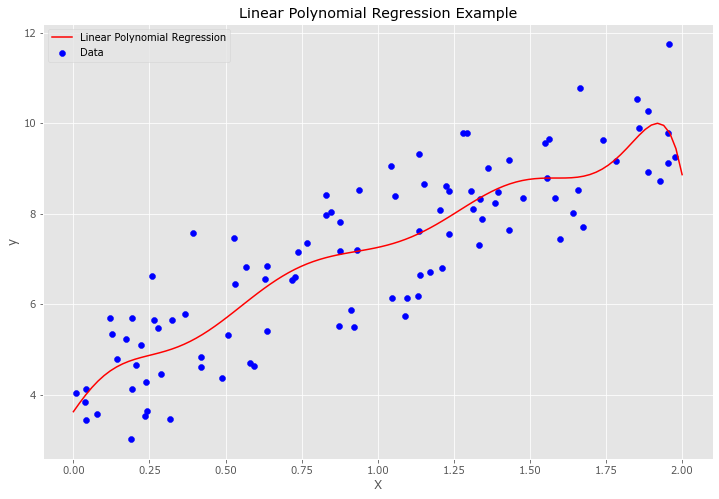

In [36]:
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
X_test_poly = np.column_stack([X_test**i for i in range(1, poly_degree + 1)])
y_pred = model.predict(X_test_poly)

# Plotting the results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Linear Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Polynomial Regression Example')
plt.legend()
plt.show()

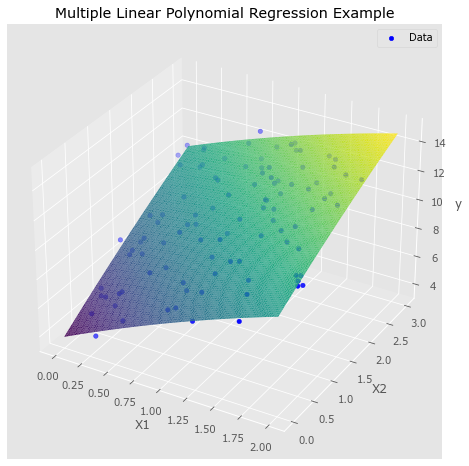

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some random data
np.random.seed(0)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
y = 4 + 3*X1 + 2*X2 + np.random.randn(100, 1)

# Combine features
X = np.hstack((X1, X2))

# Define polynomial degree
poly_degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree=poly_degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = make_pipeline(PolynomialFeatures(degree=poly_degree), LinearRegression())
model.fit(X, y)

# Generate a meshgrid of X1 and X2 values
X1_mesh, X2_mesh = np.meshgrid(np.linspace(0, 2, 100), np.linspace(0, 3, 100))
X_test_mesh = np.column_stack((X1_mesh.ravel(), X2_mesh.ravel()))

# Predictions
y_pred_mesh = model.predict(X_test_mesh)
y_pred_mesh = y_pred_mesh.reshape(X1_mesh.shape)

# Plotting the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, color='blue', label='Data')

# Plot the surface using plot_trisurf
ax.plot_trisurf(X1_mesh.ravel(), X2_mesh.ravel(), y_pred_mesh.ravel(), cmap='viridis', edgecolor='none')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Multiple Linear Polynomial Regression Example')
plt.legend()
plt.show()

In [51]:
xx1.shape

(100, 100)

In [53]:
y_pred[sort_indices].shape

(100, 1)

In [58]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate some random data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
print("Simple Linear Regression MSE:", lin_reg_mse)

# Lasso Regression (L1 Regularization)
lasso_reg = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha)
lasso_reg.fit(X_train, y_train)
lasso_reg_pred = lasso_reg.predict(X_test)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_pred)
print("Lasso Regression MSE:", lasso_reg_mse)

# Ridge Regression (L2 Regularization)
ridge_reg = Ridge(alpha=0.1)  # You can adjust the regularization strength (alpha)
ridge_reg.fit(X_train, y_train)
ridge_reg_pred = ridge_reg.predict(X_test)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_pred)
print("Ridge Regression MSE:", ridge_reg_mse)

Simple Linear Regression MSE: 0.9177532469714293
Lasso Regression MSE: 0.9155385904506887
Ridge Regression MSE: 0.9170098982685367


## Variable conversion

### Normalization

The transition to close or uniform scales improves the convergence of gradient descent and reduces the risk of overflowing numbers, but it is necessary to sacrifice direct interpretability.

Normalization is usually done for real features.

Z-score normalization:
1. Subtract the average: $x - \bar{x}$
2. Divide by the standard deviation: $\frac{x - \bar{x}}{std(x)}$

You can do it manually, you can use the method below

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# coef = PolynomialFeatures(degree = 1)
# x_poly=coef.fit_transform(np.reshape(X[parameter].values, (-1, 1)))

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

/Users/andrey.shestakov/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print('Model:\nprice = %.2f + (%.2f)*mileage`' % (model.intercept_, model.coef_[0]))

Модель:
price = 12084.24 + (-1351.67)*mileage`


### The nature of addiction

Variables do not always depend on each other exactly in the form in which they are given. Nobody prohibits dependence of the form
$$\log(y) = \beta_0 + \beta_1\log(x_1)$$
or
$$y = \beta_0 + \beta_1\frac{1}{x_1}$$
or
$$y = \beta_0 + \beta_1\log(x_1)$$
or
$$y = \beta_0 + \beta_1 x_1^2 + \beta_2 x_2^2 + \beta_3 x_1x_2 $$
etc.

Despite the fact that some nonlinear functions may arise, it all comes down to **linear** regression (for example, regarding the second point, replace $z_1 = \frac{1}{x_1}$)

#### Example: Body weight - brain

Download [data](https://www.dropbox.com/s/837utfb6yh4x8xb/weights.csv?dl=0) and information about the brain and body weights of various species. Body weight is given in kilograms, weight is given in grams.

In [5]:
df = pd.read_csv('weights.csv', sep=';', index_col=0)
df.head()

,body_w,brain_w
species,,
Mountain Beaver,1.35,8.1
Cow,465.00,423.0
Grey Wolf,36.33,119.5
Goat,27.66,115.0
Guinea Pig,1.04,5.5


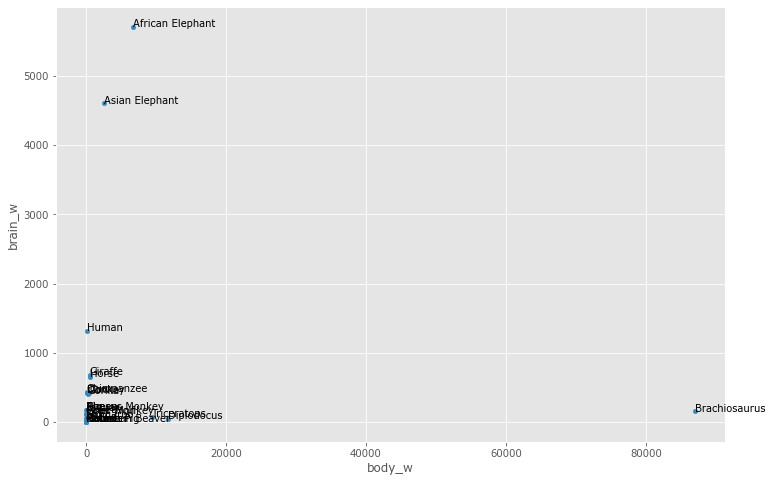

In [6]:
df.plot(x = 'body_w', y='brain_w', kind='scatter')
for k, v in df.iterrows():
    plt.annotate(k, v[:2])
# It must turn out something awkward...

Now let's take the logarithm of both variables and graph them again

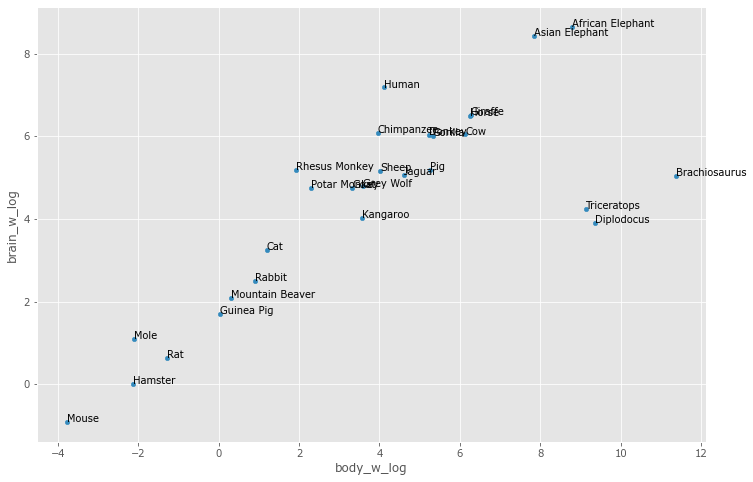

In [7]:
df.loc[:, 'body_w_log'] = np.log(df.loc[:, 'body_w'])
df.loc[:, 'brain_w_log'] = np.log(df.loc[:, 'brain_w'])

df.plot(x = 'body_w_log', y='brain_w_log', kind='scatter')
for k, v in df.iterrows():
    plt.annotate(k, v[2:])

## How to train linear regression?
Let's try to figure it out without any `.predict()` and `.fit()`

## Consider the case with one attribute and a free member

$X$ - characteristic description of observations,</p> $y$ - predicted value

Let the error function (loss function) $L(\cdot)$ be given. <br\>
We need to construct a functional $f(X)$ that will produce a value closest to $y$, in other words: $$L\left(f(X) - y\right) \rightarrow\min $$

Let's define the loss function as the sum of the squares of the difference between the output response of the functional and the real value:
$$ L(\cdot) = \frac{1}{2n}\sum_{i=1}^n(f(x^{(i)}) - y^{(i)})^2$$

Since we chose linear regression among the entire set of models, then $$f(X) = \beta_0 + \beta_1x_1$$
We substitute this expression into $L(\cdot)$ and find $\beta_0$,
$\beta_1$!

$$ L(\beta_0,\beta_1) = \frac{1}{2n}\sum^{n}_{i=1}(f(x^{(i)})  - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})^2  \rightarrow \min\limits_{\beta_0, \beta_1} $$

#### Exercise

Plot the loss function as a function of $\beta_0$ and $\beta_1$ for the car problem

In [8]:
X_model = np.c_[np.ones(X.shape), X]
X_model.shape

NameError: name 'X' is not defined

In [10]:
from mpl_toolkits import mplot3d

In [11]:
beta0 = np.linspace(11000 , 13000, 100)
beta1 = np.linspace(-2450, -250, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

# # Your Code Here
L = X_model.dot(B_all) - y.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)


fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 25)
ax.plot_surface(B0, B1, L, alpha=0.3,)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')

NameError: name 'X_model' is not defined

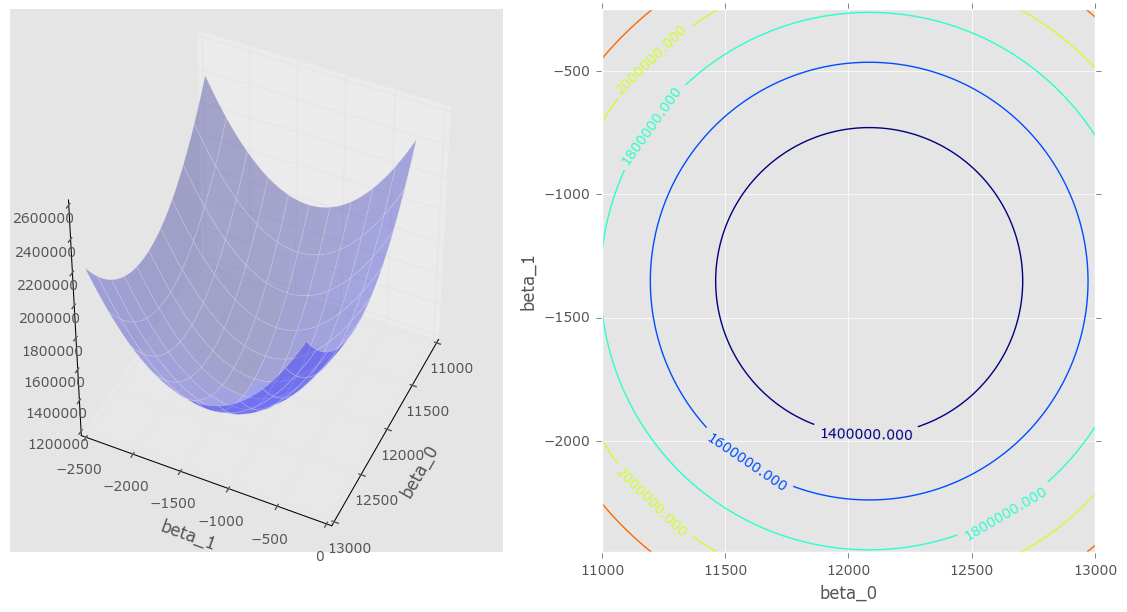

In [47]:
beta0 = np.linspace(11000 , 13000, 100)
beta1 = np.linspace(-2450, -250, 100)

B0, B1= np.meshgrid(beta0, beta1)

B_all = np.c_[B0.reshape(-1,1), B1.reshape(-1,1)].T

# # Your Code Here
L = X_model.dot(B_all) - y.reshape(-1,1)
L = L ** 2
L = L.mean(axis=0)/2
L = L.reshape(B0.shape)


fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(40, 25)
ax.plot_surface(B0, B1, L, alpha=0.3,)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')

ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(B0, B1, L)
plt.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')